## Steepest Descent for Energy Minimisation

### 1D Simple Harmonic Oscillator

In [21]:
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# Define force (gradient) and energy functions ...

def grad(x, k=1.0):
    dfx = k * x
    return dfx

def nrg(x, k=1.0):
    return 0.5*k*x**2

In [23]:
# Initialise some variables ...

x = 10.0
a = 0.1
tol = 1.0e-5

listx = [x]

In [24]:
# Run steepest descent ...

for _ in range(100):
    if abs(grad(x)) < tol:
        break
    x += a* (- grad(x))
    listx.append(x)
    print(x)

9.0
8.1
7.289999999999999
6.560999999999999
5.9049
5.31441
4.782969
4.3046720999999994
3.8742048899999997
3.4867844009999995
3.1381059608999995
2.8242953648099993
2.541865828328999
2.2876792454960992
2.058911320946489
1.8530201888518403
1.6677181699666561
1.5009463529699905
1.3508517176729913
1.215766545905692
1.094189891315123
0.9847709021836106
0.8862938119652496
0.7976644307687246
0.7178979876918521
0.6461081889226669
0.5814973700304001
0.5233476330273601
0.4710128697246241
0.4239115827521617
0.3815204244769455
0.34336838202925096
0.30903154382632586
0.2781283894436933
0.25031555049932397
0.22528399544939157
0.2027555959044524
0.18248003631400717
0.16423203268260644
0.1478088294143458
0.13302794647291122
0.1197251518256201
0.10775263664305809
0.09697737297875228
0.08727963568087704
0.07855167211278934
0.0706965049015104
0.06362685441135936
0.05726416897022342
0.051537752073201076
0.04638397686588097
0.04174557917929288
0.03757102126136359
0.03381391913522723
0.030432527221704506
0.0

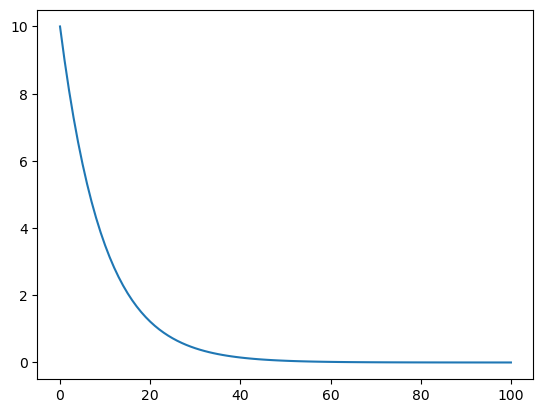

In [25]:
# Plot position with steps ...

plt.plot(listx)
plt.show()

### 2D Simple Harmonic Oscillator

In [26]:
# Define force (gradient) and energy functions ...

def grad(x,y,kx=1.0, ky=1.0):
    dfx = kx * x
    dfy = ky * y
    return dfx, dfy

def nrg(x,y,kx=1.0,ky=1.0):
    return 0.5*(kx*x**2 + ky*y**2)

In [27]:
# Initialise some variables ...

# Initial position
x = y = 8.0

# Force constants
kx = 3.0
ky = 1.0

steps = 1000
alpha = 0.1
tol = 1.0e-3

xlist = [x]
ylist = [y]

In [28]:
# Start Steepest Descent
for step in range(steps):
    dfx, dfy = grad(x,y,kx,ky)
    if dfx**2 + dfy**2 < tol:
        print(50*"#")
        print(f'Converged after {step} steps!')
        print(50*"#")
        break

    x -= alpha*dfx
    y -= alpha*dfy
    xlist.append(x)
    ylist.append(y)
    print(f'Energy = {nrg(x,y,kx,ky)}')

Energy = 72.96
Energy = 44.0448
Energy = 28.300416000000002
Energy = 19.309159680000004
Energy = 13.869472473600002
Energy = 10.366508738688001
Energy = 7.971667735522561
Energy = 6.24870073779406
Energy = 4.959356034903374
Energy = 3.9670535225439245
Energy = 3.188801169053953
Energy = 2.570917976672455
Energy = 2.076558185676678
Energy = 1.6791282964383833
Energy = 1.358680841474825
Energy = 1.0998390730608782
Energy = 0.8905303689977835
Energy = 0.7211633515992562
Energy = 0.5840608536238125
Energy = 0.4730493754612116
Energy = 0.38315043529628384
Energy = 0.3103422687646141
Energy = 0.2513725416249033
Energy = 0.20360945763969898
Energy = 0.1649225331606845
Energy = 0.13358669937169332
Energy = 0.10820495577172567
Energy = 0.08764588152261829
Energy = 0.07099309903360584
Energy = 0.05750437836736041
Energy = 0.04657853087113036
Energy = 0.037728602358464126
Energy = 0.03056016416325173
Energy = 0.024753731136152837
Energy = 0.02005052132060407
Energy = 0.016240921828846233
Energy =

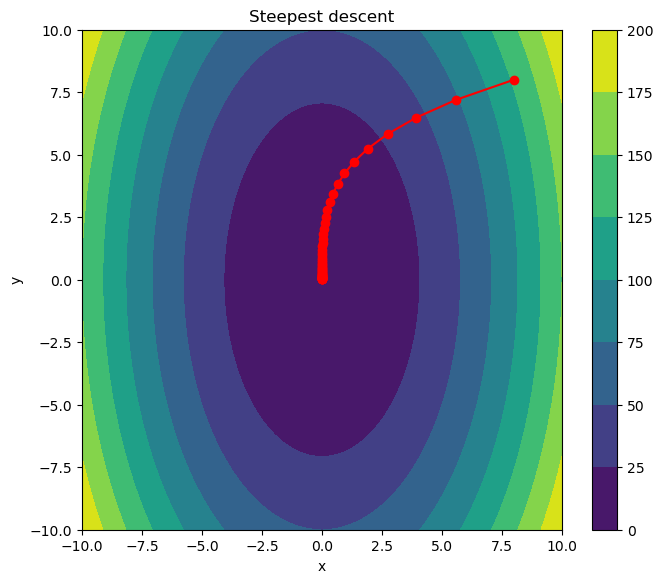

In [29]:
# Plotting starts here ...

fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.0, 0.0, 1.0, 1.0
ax = fig.add_axes([left, bottom, width, height])

start, stop, n_values = -10, 10, 1000

x_vals = np.linspace(start, stop, n_values)
y_vals = np.linspace(start, stop, n_values)
X, Y = np.meshgrid(x_vals, y_vals)

Z = 0.5*(kx*X**2 + ky*Y**2)

cp = plt.contourf(X, Y, Z)
plt.colorbar(cp)

ax.set_title('Steepest descent')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.plot(xlist,ylist,"ro-")
plt.show()

### 2D Lennard Jones particles (without PBC)

In [30]:
# Compute forces acting on all LJ particles ...

def force(pos):
    """
    Input: Coordinates of N particles in (Nx2) numpy array
    Output: Forces on N particles in (Nx2) numpy array
    """
    f = np.zeros((len(pos),2))
    for i in range(len(pos)-1):
        for j in range(i+1, len(pos)):
            r = np.linalg.norm(pos[i]-pos[j])
            fij = (6/r**2)*(2/r**12 - 1/r**6)*(pos[i]-pos[j])
            f[i] += fij
            f[j] -= fij
    return f

In [31]:
# Compute total potential energy of the system

def potnrg(pos):
    """
    Input: Coordinates of N particles in (Nx2) numpy array
    Output: Total potential energy of the system
    """
    nrg = 0.0
    for i in range(len(pos)-1):
        for j in range(i+1, len(pos)):
            r = np.linalg.norm(pos[i]-pos[j])
            nrg += 1/r**12 - 1/r**6
    return nrg

In [32]:
# Initialise coordinates on a square grid with some spacing

def create_grid(npart, spacing=0.9):
    pos = np.zeros((npart,2))
    for i in range(boxl):
        for j in range(boxl):
            pos[3*i+j] = spacing*np.array([i,j])
    return pos

In [33]:
# Initialise coordinates randomly in a square of length "spacing"

def create_random(npart, spacing=2.0):
    return np.random.random((npart,2))*spacing

In [34]:
#Initialise the system ...

boxl = 3
npart = boxl**2 # Number of particles
steps = 1000
alpha = 0.001
tol = 1.0e-4
nrglist = []

In [35]:
# We'll try different methods of creating initial positions

pos = create_grid(npart, 1.2)

# random initialisation might be problematic. Let's see!
# pos = create_random(npart, 1.2)

In [36]:
# Compute energy for the initial configuration

oldnrg = potnrg(pos)
nrglist.append(oldnrg)

print(f"Initial energy: {oldnrg}")

Initial energy: -3.0476900367548745


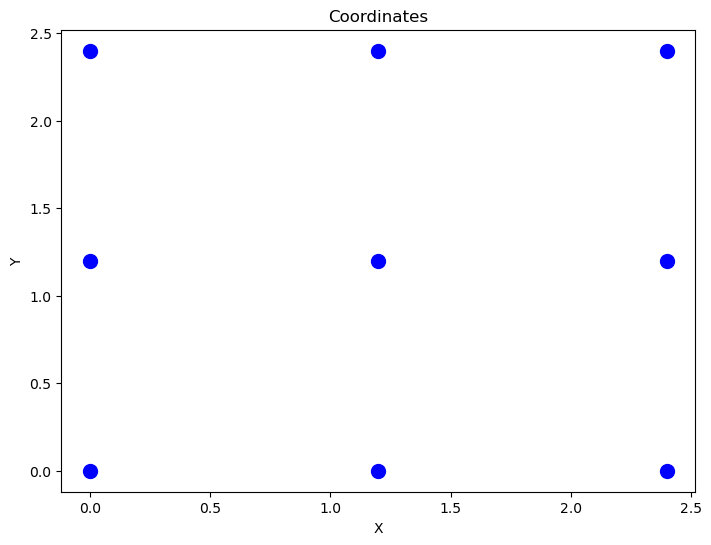

In [37]:
# Visualise initial configuration ...

plt.figure(1,figsize=(18, 6))
plt.subplot(121)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Coordinates')
# Initial coordinates
plt.scatter(pos[:,0],pos[:,1],s=100,c="b", label="Before") # Before

pos_init = pos.copy()

In [38]:
#Steepest descent starts ...

for step in range(steps):
    pos += alpha*force(pos)
    newnrg = potnrg(pos)
    nrglist.append(newnrg)
    print("Energy = ", newnrg)
    if abs(newnrg-oldnrg) < tol:
        print(f"\n Converged after {step} steps!")
        break
    oldnrg = newnrg

Energy =  -3.053643973999835
Energy =  -3.05957915089658
Energy =  -3.0654950175412634
Energy =  -3.071391023139473
Energy =  -3.077266616228607
Energy =  -3.0831212449053167
Energy =  -3.088954357057888
Energy =  -3.0947654006035012
Energy =  -3.1005538237301966
Energy =  -3.10631907514349
Energy =  -3.1120606043174357
Energy =  -3.1177778617500267
Energy =  -3.123470299222768
Energy =  -3.129137370064257
Energy =  -3.1347785294175896
Energy =  -3.1403932345114045
Energy =  -3.1459809449343656
Energy =  -3.1515411229128687
Energy =  -3.1570732335917744
Energy =  -3.1625767453178963
Energy =  -3.168051129926045
Energy =  -3.1734958630273464
Energy =  -3.1789104242995867
Energy =  -3.1842942977793083
Energy =  -3.1896469721553853
Energy =  -3.1949679410637613
Energy =  -3.200256703383086
Energy =  -3.2055127635309137
Energy =  -3.210735631760159
Energy =  -3.2159248244554752
Energy =  -3.2210798644292424
Energy =  -3.2262002812167987
Energy =  -3.231285611370582
Energy =  -3.23633539875

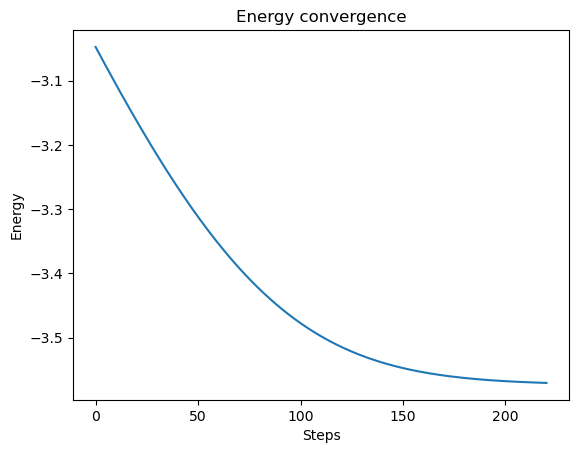

In [39]:
# Plot energy convergence ...

plt.xlabel('Steps')
plt.ylabel('Energy')
plt.title('Energy convergence')
plt.plot(nrglist)
plt.show()

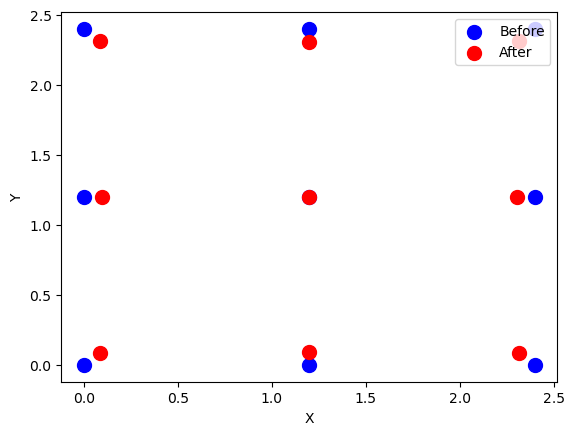

In [40]:
# Compare initial and final coordinates

plt.xlabel('X')
plt.ylabel('Y')
# Initial coordinates
plt.scatter(pos_init[:,0],pos_init[:,1],s=100,c="b", label="Before") # Before
# Final coordinates
plt.scatter(pos[:,0],pos[:,1],s=100,c="r", label="After") # After

plt.legend()

### Now, try out with the random initial configuration! 